#### Instructions
###### Follow the instructions given in comments prefixed with ## and write your code below that.
###### Also fill the partial code in given blanks.
###### Don't make any changes to the rest part of the codes
###### Duetime:1:30 PM

In [36]:
## import cv2
import cv2
## import numpy
import numpy as np
## import matplotlib pyplot
import matplotlib.pyplot as plt
## import KMeans cluster from sklearn
from sklearn.cluster import KMeans
## import distance from scipy.spatial
from scipy.spatial import distance
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

## Face Detection on given image

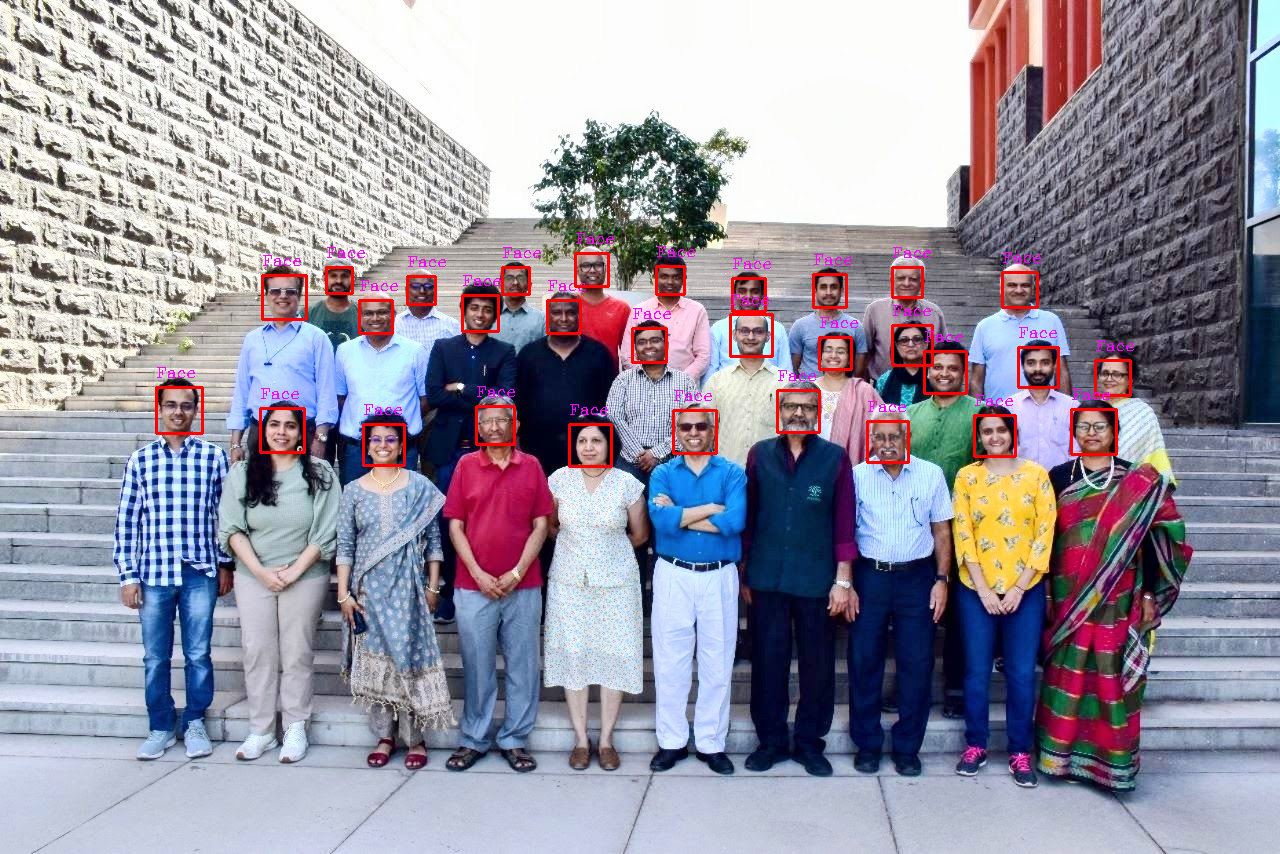

Total number of faces detected are30


In [46]:
## Reading the image plaksha_Faculty.jpg
img = cv2.imread('/content/Plaksha_Faculty.jpg')

## Convert the image to grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

## Loading the required haar-cascade xml classifier file
face_cascade = cv2.CascadeClassifier('/content/haarcascade_frontalface_alt2.xml')

# Applying the face detection method on the grayscale image.
## Change the parameters for better detection of faces in your case.
faces_rect = face_cascade.detectMultiScale(gray_img, minSize=(15,15))

# Define the text and font parameters
text = "Face" ## The text you want to write
font = cv2.FONT_HERSHEY_COMPLEX  ## Font type
font_scale = 0.5  ## Font scale factor
font_color = (255,0,255)  ## Text color in BGR format (here, it's red)
font_thickness = 1  ## Thickness of the text


# Iterating through rectangles of detected faces
for (x, y, w, h) in faces_rect:
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 0, 255), 2)
    # Use cv2.putText to add the text to the image, Use text, font, font_scale, font_color, font_thickness here
    cv2.putText(img, text,(x,y-10) , font, font_scale, font_color, font_thickness)

## Display the image and window title should be "Total number of face detected are #"
from google.colab.patches import cv2_imshow
cv2_imshow(img)
print(f"Total number of faces detected are{len(faces_rect)}")
cv2.waitKey(0)
cv2.destroyAllWindows()

## Visualising images by their hue and saturation features

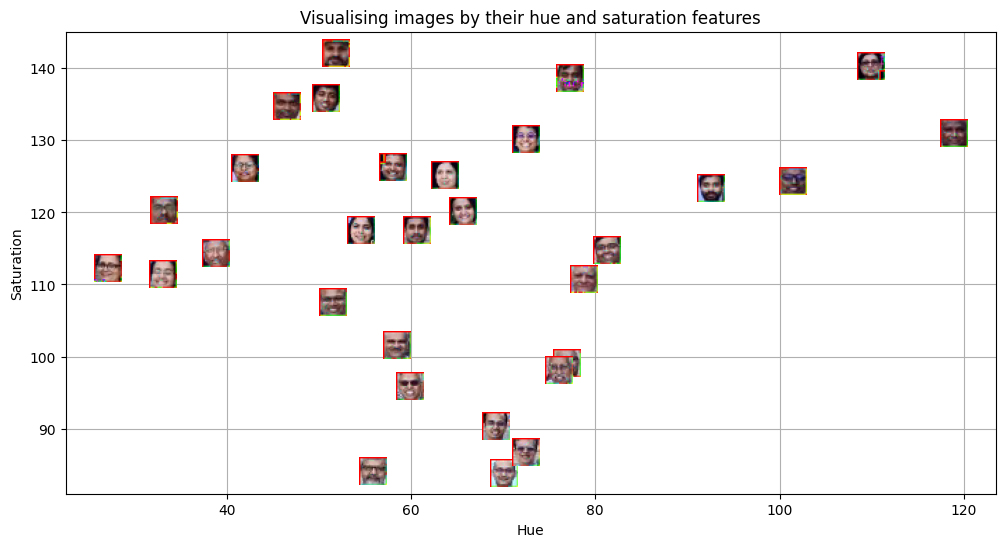

In [47]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
# Extract face region features (Hue and Saturation)
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV) ## call the img and convert it from BGR to HSV and store in img_hsv
hue_saturation = []
face_images = []  # To store detected face images

for (x, y, w, h) in faces_rect:
    face = img_hsv[y:y + h, x:x + w]
    hue = np.mean(face[:,:,0])  ## extract mean hue for the face
    saturation = np.mean(face[:,:,1]) ## extract mean saturation for the face
    hue_saturation.append((hue, saturation))
    face_images.append(face)

hue_saturation = np.array(hue_saturation)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the clustered faces with custom markers
for i, (x,y,w,h ) in enumerate(faces_rect):
    im = OffsetImage(cv2.cvtColor(cv2.resize(face_images[i], (20, 20)), cv2.COLOR_HSV2RGB))
    ab = AnnotationBbox(im, (hue_saturation[i, 0], hue_saturation[i, 1]), frameon=False, pad=0)
    ax.add_artist(ab)
    plt.plot(hue_saturation[i, 0], hue_saturation[i, 1])


## Put x label
plt.xlabel("Hue")
## Put y label
plt.ylabel("Saturation")
## Put title
plt.title("Visualising images by their hue and saturation features")
## Put grid
plt.grid()
## show the plot
plt.show()

## Assign class labels to each face using kmeans. Visualise the clusters formed

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


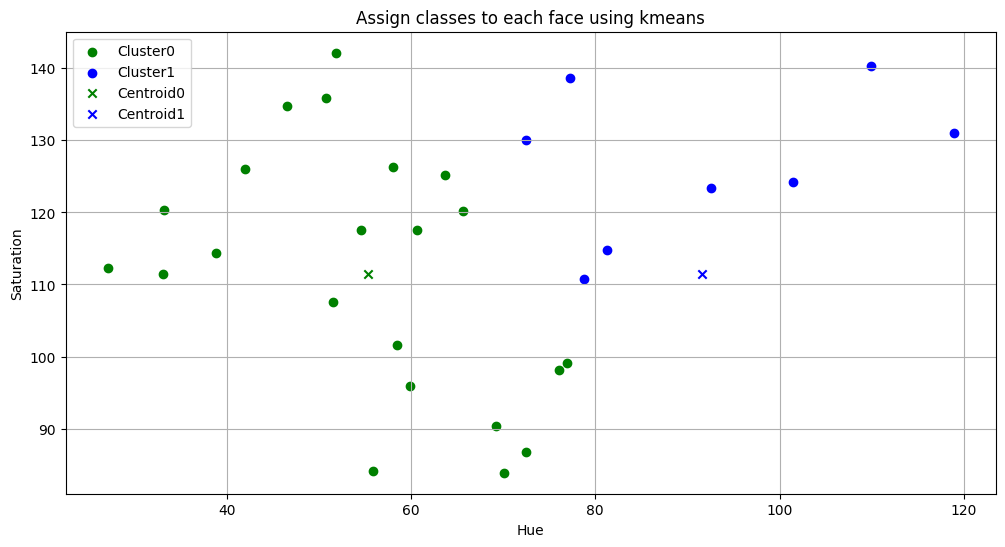

In [53]:
## Perform k-Means clustering on hue_saturation and store in kmeans
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(hue_saturation)
#centroids = kmeans.cluster_centers_
centroids = kmeans.cluster_centers_
#labels = kmeans.labels_
labels=kmeans.labels_

# Create an empty list to store legend labels
legend_labels = []

# Create lists to store points for each cluster
cluster_0_points = []
cluster_1_points = []

# Collect points for cluster plot
fig, ax = plt.subplots(figsize=(12, 6))
for i, (x, y, w, h) in enumerate(faces_rect):
    if kmeans.labels_[i] == 0:
        cluster_0_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))
    else:
        cluster_1_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))


cluster_0_points = np.array(cluster_0_points)
## Plot points for cluster 0 in green
plt.scatter(cluster_0_points[:, 0], cluster_0_points[:, 1], c='green', label='Cluster0')


cluster_1_points = np.array(cluster_1_points)
## Plot points for cluster 1 in blue
plt.scatter(cluster_1_points[:, 0], cluster_1_points[:, 1], c='blue', label='Cluster1')

## Calculate and plot centroids
centroid_0 = np.mean(cluster_0_points, axis=0)
centroid_1 = np.mean(cluster_1_points, axis=0)

# Plot both the centroid for cluster 0 and cluster 1
plt.scatter(centroid_0[0], centroid_0[1], c='green', marker='x', label='Centroid0')
plt.scatter(centroid_1[0], centroid_0[1], c='blue', marker='x', label='Centroid1')

## Put x label
plt.xlabel("Hue")
## Put y label
plt.ylabel("Saturation")
## Put title
plt.title("Assign classes to each face using kmeans")
## Add a legend
plt.legend()
## Add grid
plt.grid()
## Show the plot
plt.show()


## Face detection on shashi tharoor

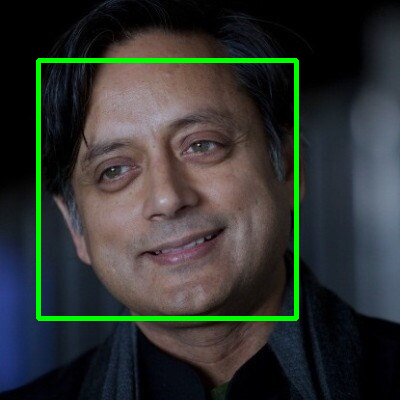

In [49]:
## Read the class of the template image 'Dr_Shashi_Tharoor.jpg' using cv2 and store it in template_img
template_img = cv2.imread('/content/Shashi_Tharoor.jpeg')
# Detect face  in the template image after converting it to gray and store it in template_faces
tem_gray = cv2.cvtColor(template_img, cv2.COLOR_BGR2GRAY)
template_faces = face_cascade.detectMultiScale(tem_gray, scaleFactor=1.1, minNeighbors=7)
# Draw rectangles around the detected faces
for (x, y, w, h) in template_faces:
    cv2.rectangle(template_img, (x, y), (x + w, y + h), (0, 255, 0), 3)
cv2_imshow(template_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Plot template image along with other images

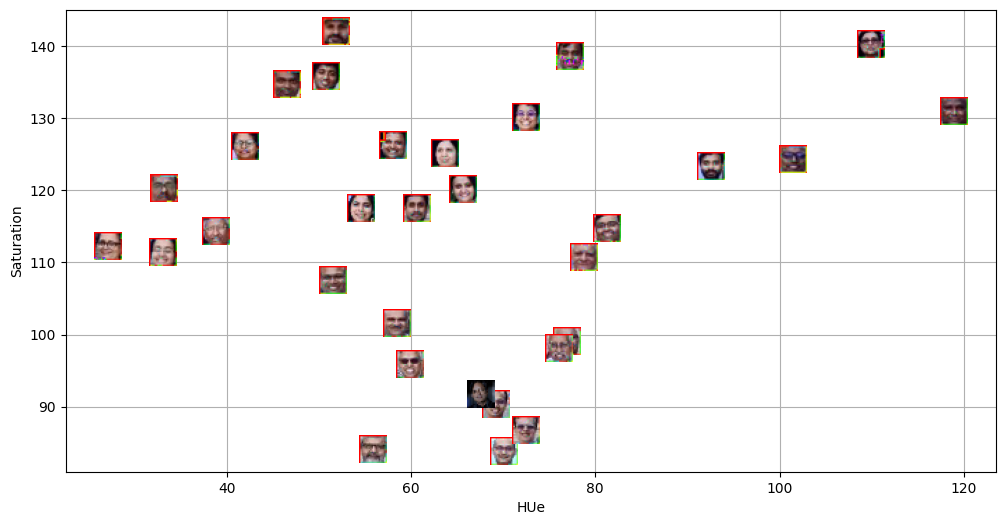

In [50]:
# Convert the template image to HSV color space and store it in template_hsv
template_hsv = cv2.cvtColor(template_img, cv2.COLOR_BGR2HSV)

# Extract hue and saturation features from the template image as we did it for detected faces.
template_hue = np.mean(template_hsv[:,:,0])
template_saturation = np.mean(template_hsv[:,:,1])

# Create a figure and axis for visualization
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the clustered faces, along with the template face
for i, (x, y, w, h) in enumerate(faces_rect):
    color = 'red' if kmeans.labels_[i] == 0 else 'blue'
    im = OffsetImage(cv2.cvtColor(cv2.resize(face_images[i], (20, 20)), cv2.COLOR_HSV2RGB))
    ab = AnnotationBbox(im, (hue_saturation[i, 0], hue_saturation[i, 1]), frameon=False, pad=0)
    ax.add_artist(ab)
    plt.plot(hue_saturation[i, 0], hue_saturation[i, 1], 'o', markersize=5, color=color)

# Plot the template image
im = OffsetImage(cv2.cvtColor(cv2.resize(template_img, (20, 20)), cv2.COLOR_BGR2RGB))
ab = AnnotationBbox(im, (template_hue, template_saturation), frameon=False, pad=0)
ax.add_artist(ab)

## Put x label
plt.xlabel("HUe")
## Put y label
plt.ylabel("Saturation")
## Put title
# plt.puttitle("Face detection")
## Add grid
plt.grid()
## show plot
plt.show()

## Perform classification on new image using distance from clusters. Visualise the clusters.

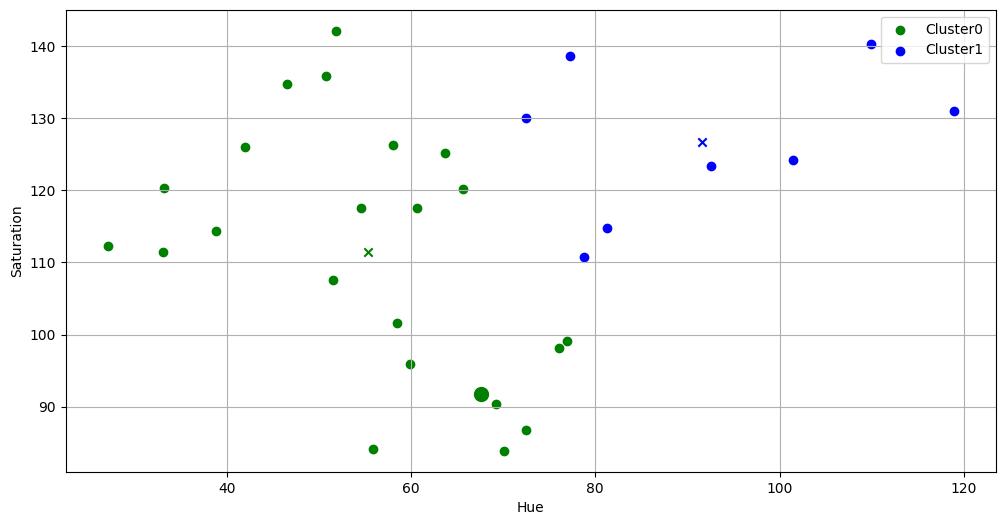

In [57]:
## Find distance for new image from each cluster.
new_image_hue_saturation= np.array([template_hue, template_saturation])
distance_from_cluster0 = distance.euclidean(centroid_0, new_image_hue_saturation)
distance_from_cluster1 = distance.euclidean(centroid_1, new_image_hue_saturation)
## Predict the cluster label for the template image and store it in template_label.
template_label = kmeans.predict(new_image_hue_saturation.reshape(1,-1))[0]

# Create lists to store points for each cluster
cluster_0_points = []
cluster_1_points = []

fig, ax = plt.subplots(figsize=(12, 6))
for i, (x, y, w, h) in enumerate(faces_rect):
    if kmeans.labels_[i] == 0:
        cluster_0_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))
    else:
        cluster_1_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))

# Plot points for cluster 0 in green
cluster_0_points = np.array(cluster_0_points)
plt.scatter(cluster_0_points[:,0], cluster_0_points[:,1], c='green', label='Cluster0')

# Plot points for cluster 1 in blue
cluster_1_points = np.array(cluster_1_points)
plt.scatter(cluster_1_points[:,0], cluster_1_points[:,1], c='blue', label='Cluster1')


# Assign color to the template image based on class label
if template_label == 0:
    color = 'green'
else:
    color = 'blue'

# Calculate and plot centroids for both the clusters
centroid_0 = np.mean(cluster_0_points, axis=0)
centroid_1 = np.mean(cluster_1_points, axis=0)
plt.scatter(centroid_0[0], centroid_0[1], c='green', marker='x') ## plot for centroid 0
plt.scatter(centroid_1[0], centroid_1[1], c='blue', marker='x')  ## plot for centroid 1
# Plot the template image's position with appropriate class color
plt.plot(template_hue, template_saturation, marker='o', c= color, markersize= 10)

## Put x label
plt.xlabel("Hue")
## Put y label
plt.ylabel("Saturation")
## Put title
# plt.puttitle("") #Removed as causing error in collab
## Add a legend
plt.legend()
## Add grid
plt.grid()
## show the plot
plt.show()
                                            ## End of the lab 5 ##